## Домашнее задание
### Задача: определить регион США, в которой находится квартира.

### Описание датасета:
Датасет содержит информацию о съёмных квартирах в США.

Признаки, содержащиеся в датасете:

* ID квартиры в датасете
* URL квартиры на сайте для аренды
* Регион квартиры на сайте для аренды
* URL региона квартиры
* Арендная плата за месяц
* Тип застройки
* Площадь квартиры
* Количество кроватей
* Количество ванных комнат
* Разрешение на котов
* Разрешение на собак
* Разрешение на курение
* Доступ для инвалидных колясок
* Доступ к зарядным устройствам для электромобилей
* Наличие мобели
* Доступные варианты стирки
* Доступные варианты парковки
* URL изображения
* Описание
* Широта
* Долгота
* Штат

In [1]:
import sklearn
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

### 1. Чтение данных

In [2]:
url = "housing.csv"
data_raw = pd.read_csv(url)

In [3]:
data_raw["state"].unique()

array(['ca', 'co', 'ct', 'dc', 'fl', 'de', 'ga', 'hi', 'id', 'il', 'in',
       'ia', 'ks', 'ky', 'la', 'me', 'mi', 'md', 'ma', 'mn', 'ms', 'nc',
       'mo', 'mt', 'ne', 'nv', 'nj', 'nm', 'ny', 'nh', 'oh', 'nd', 'ok',
       'or', 'pa', 'ri', 'sc', 'tn', 'sd', 'tx', 'ut', 'va', 'vt', 'wa',
       'wv', 'wi', 'wy', 'al', 'az', 'ak', 'ar'], dtype=object)

Создадим новый признак - регион, в котором находится квартира. Всего в США 4 региона: West, Midwest, South, Northeast. Существуют штаты, не принадлежащие ни одному региону, их отметим как принадлежащих к региону Other. 

In [4]:
states = {
        'ak': 'o',
        'al': 's',
        'ar': 's',
        'as': 'o',
        'az': 'w',
        'ca': 'w',
        'co': 'w',
        'ct': 'n',
        'dc': 'n',
        'de': 'n',
        'fl': 's',
        'ga': 's',
        'gu': 'o',
        'hi': 'o',
        'ia': 'm',
        'id': 'w',
        'il': 'm',
        'in': 'm',
        'ks': 'm',
        'ky': 's',
        'la': 's',
        'ma': 'n',
        'md': 'n',
        'me': 'n',
        'mi': 'w',
        'mn': 'm',
        'mo': 'm',
        'mp': 'o',
        'ms': 's',
        'mt': 'w',
        'na': 'o',
        'nc': 's',
        'nd': 'm',
        'ne': 'w',
        'nh': 'n',
        'nj': 'n',
        'nm': 'w',
        'nv': 'w',
        'ny': 'n',
        'oh': 'm',
        'ok': 's',
        'or': 'w',
        'pa': 'n',
        'pr': 'o',
        'ri': 'n',
        'sc': 's',
        'sd': 'm',
        'tn': 's',
        'tx': 's',
        'ut': 'w',
        'va': 's',
        'vi': 'o',
        'vt': 'n',
        'wa': 'w',
        'wi': 'm',
        'wv': 's',
        'wy': 'w'
}

In [5]:
data_raw['reg'] = data_raw.apply(
    lambda row: states.get(row.state), axis = 1)
data_raw['reg']

0         w
1         w
2         w
3         w
4         w
         ..
384972    w
384973    w
384974    w
384975    w
384976    w
Name: reg, Length: 384977, dtype: object

In [6]:
# subset = np.random.choice(np.arange(data_raw.shape[0]), size=100000, replace=False)

In [7]:
# data_raw = data_raw.iloc[subset]

In [8]:
data_raw.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state,reg
0,7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148,apartment,1078,3,2.0,1,...,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca,w
1,7049047186,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,1200,condo,1001,2,2.0,0,...,0,0,w/d hookups,carport,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca,w
2,7043634882,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,1813,apartment,1683,2,2.0,1,...,0,0,w/d in unit,attached garage,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca,w
3,7049045324,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095,apartment,708,1,1.0,1,...,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca,w
4,7049043759,https://reno.craigslist.org/apa/d/reno-no-long...,reno / tahoe,https://reno.craigslist.org,289,apartment,250,0,1.0,1,...,0,1,laundry on site,NaN,https://images.craigslist.org/01616_fALAWFV8zQ...,"Move In Today: Reno Low-Cost, Clean & Furnishe...",39.5357,-119.805,ca,w


In [9]:
data_raw.tail()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state,reg
384972,7049053337,https://reno.craigslist.org/apa/d/reno-2x2-thi...,reno / tahoe,https://reno.craigslist.org,1295,apartment,957,2,2.0,1,...,0,0,w/d in unit,carport,https://images.craigslist.org/00O0O_atyH2pgYeH...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca,w
384973,7049052968,https://reno.craigslist.org/apa/d/sparks-over-...,reno / tahoe,https://reno.craigslist.org,1549,apartment,1034,2,2.0,1,...,0,0,w/d in unit,NaN,https://images.craigslist.org/00808_3EobCZHFEx...,AN OASIS OF YOUR OWN Introducing Lumina at Spa...,39.6269,-119.708,ca,w
384974,7049050454,https://reno.craigslist.org/apa/d/sparks-1mont...,reno / tahoe,https://reno.craigslist.org,1249,apartment,840,2,1.0,1,...,0,0,laundry on site,off-street parking,https://images.craigslist.org/01111_kr3uKMhzrf...,***Newly MODERNIZED Apartment Home*** âï¸ ...,39.5358,-119.746,ca,w
384975,7049050149,https://reno.craigslist.org/apa/d/sparks-ready...,reno / tahoe,https://reno.craigslist.org,1429,apartment,976,2,2.0,1,...,0,0,w/d in unit,carport,https://images.craigslist.org/00c0c_1GslcQnpLP...,Welcome Home We welcome you to The Villas at D...,39.5585,-119.703,ca,w
384976,7049050010,https://reno.craigslist.org/apa/d/reno-2x2-thi...,reno / tahoe,https://reno.craigslist.org,1295,apartment,957,2,2.0,1,...,0,0,w/d in unit,carport,https://images.craigslist.org/00O0O_atyH2pgYeH...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca,w


In [10]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384977 entries, 0 to 384976
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       384977 non-null  int64  
 1   url                      384977 non-null  object 
 2   region                   384977 non-null  object 
 3   region_url               384977 non-null  object 
 4   price                    384977 non-null  int64  
 5   type                     384977 non-null  object 
 6   sqfeet                   384977 non-null  int64  
 7   beds                     384977 non-null  int64  
 8   baths                    384977 non-null  float64
 9   cats_allowed             384977 non-null  int64  
 10  dogs_allowed             384977 non-null  int64  
 11  smoking_allowed          384977 non-null  int64  
 12  wheelchair_access        384977 non-null  int64  
 13  electric_vehicle_charge  384977 non-null  int64  
 14  come

### 2. Визуализация данных

In [11]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=1000, replace=False)

In [12]:
# sns.pairplot(data_raw.iloc[random_subset], hue='type', diag_kind='hist')
# plt.legend()
# pass

In [13]:
corr_mat = data_raw.corr()
corr_mat

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
id,1.000000,-0.001007,-0.005020,-0.017955,-0.034989,0.043519,0.035490,0.016859,0.007454,0.019405,-0.030675,-0.001577,-0.082735
price,-0.001007,1.000000,0.000009,0.000062,0.000153,0.000973,0.000990,0.000970,-0.000402,-0.000176,-0.000353,-0.001411,0.000766
sqfeet,-0.005020,0.000009,1.000000,0.003840,0.011193,-0.003811,-0.002760,-0.002142,-0.001216,-0.000126,0.001180,0.006790,-0.002861
beds,-0.017955,0.000062,0.003840,1.000000,0.416422,-0.022956,-0.013523,-0.001158,-0.011393,-0.004735,0.002215,0.008768,0.007637
baths,-0.034989,0.000153,0.011193,0.416422,1.000000,-0.019929,0.017550,-0.014775,0.018623,0.007887,0.038069,-0.078356,-0.005544
cats_allowed,0.043519,0.000973,-0.003811,-0.022956,-0.019929,1.000000,0.887297,0.017029,0.122366,0.049356,-0.058884,-0.015717,0.033789
dogs_allowed,0.035490,0.000990,-0.002760,-0.013523,0.017550,0.887297,1.000000,0.013796,0.129112,0.049274,-0.037666,-0.056582,0.018675
smoking_allowed,0.016859,0.000970,-0.002142,-0.001158,-0.014775,0.017029,0.013796,1.000000,-0.223623,-0.096017,-0.161351,-0.177156,0.162939
wheelchair_access,0.007454,-0.000402,-0.001216,-0.011393,0.018623,0.122366,0.129112,-0.223623,1.000000,0.193245,0.195817,0.002746,-0.025197
electric_vehicle_charge,0.019405,-0.000176,-0.000126,-0.004735,0.007887,0.049356,0.049274,-0.096017,0.193245,1.000000,0.069611,0.026055,-0.060418


<AxesSubplot:>

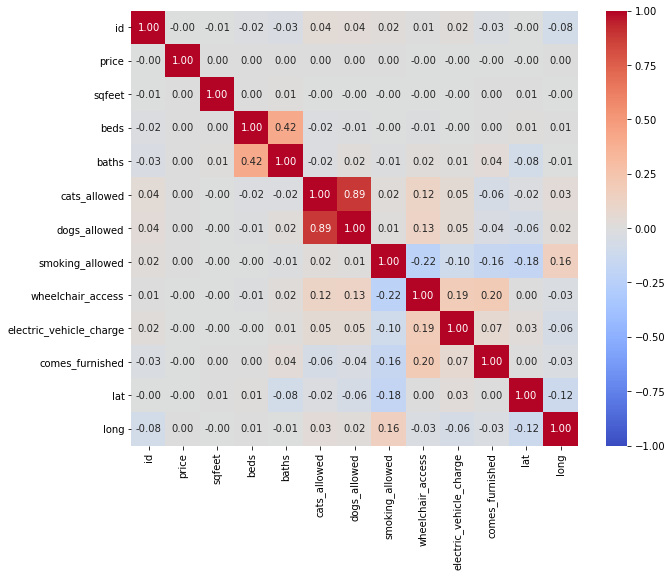

In [14]:
plt.figure(figsize = (10,8))
sns.heatmap(data_raw.corr(),annot=True,fmt='.2f',vmin=-1, vmax=1,cmap="coolwarm")

Разрешение на собак и разрешение на котов сильно коррелируют. Также, существует вполне очевидная связь между числом кроватей и числом ванных комнат.

<AxesSubplot:xlabel='reg', ylabel='count'>

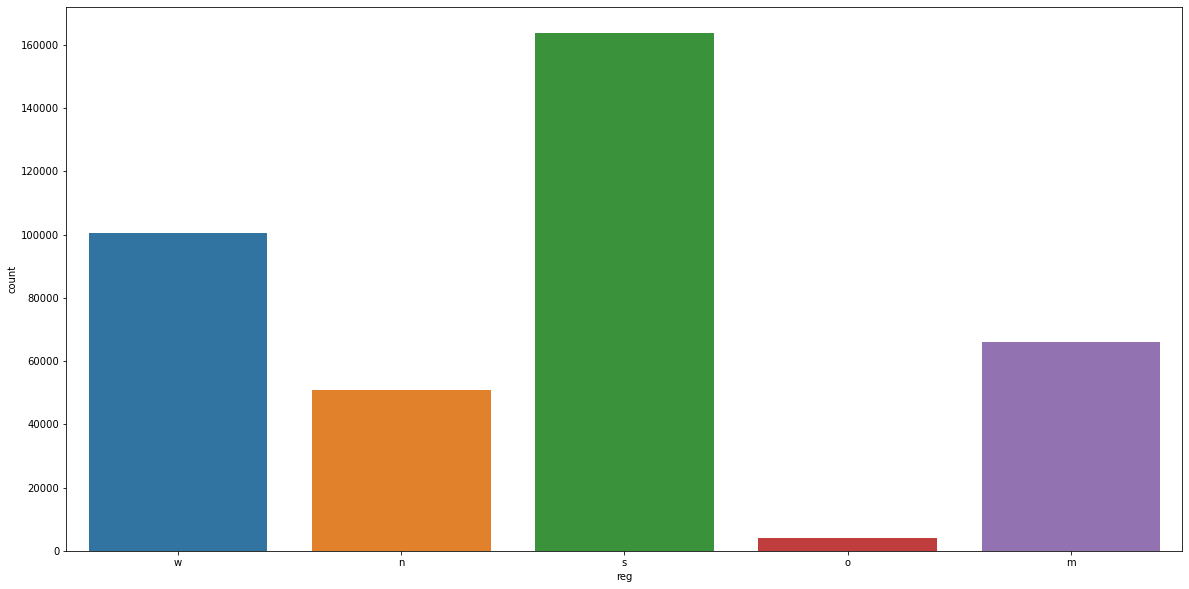

In [15]:
plt.figure(figsize=(20,10))
sns.countplot(x='reg',data = data_raw)

Классы несбалансированны, преобладает класс 's' - South

### 3. Обработка данных

In [16]:
data_raw.isna().sum()

id                              0
url                             0
region                          0
region_url                      0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             79026
parking_options            140687
image_url                       0
description                     2
lat                          1918
long                         1918
state                           0
reg                             0
dtype: int64

In [17]:
data_raw.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,3.849770e+05,3.849770e+05,3.849770e+05,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,383059.000000,383059.000000
mean,7.040982e+09,8.825722e+03,1.059900e+03,1.905345,1.480718,0.726890,0.707918,0.731771,0.082111,0.012871,0.048128,37.233487,-92.700631
std,8.800376e+06,4.462200e+06,1.915076e+04,3.494572,0.618061,0.445557,0.454721,0.443038,0.274535,0.112718,0.214036,5.546171,16.531980
min,7.003808e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000
25%,7.035979e+09,8.050000e+02,7.500000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.454700,-100.775000
50%,7.043320e+09,1.036000e+03,9.490000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.647800,-87.745100
75%,7.048426e+09,1.395000e+03,1.150000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.138300,-81.179600
max,7.051292e+09,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,172.633000


Исключим ненужные признаки и сильно признак 'cats_allowed', коррелирующий с признаком 'dogs_allowed'.

In [18]:
columns_to_remove = ['id', 'url', 'region', 'region_url', 'image_url', 'cats_allowed', 'description', 'parking_options', 'lat', 'long', 'state']
data = data_raw.drop(columns_to_remove, axis = 1)

In [19]:
data.isna().sum()

price                          0
type                           0
sqfeet                         0
beds                           0
baths                          0
dogs_allowed                   0
smoking_allowed                0
wheelchair_access              0
electric_vehicle_charge        0
comes_furnished                0
laundry_options            79026
reg                            0
dtype: int64

Исключим строки, содержащие пропущеные значения

In [20]:
data = data.dropna()

In [21]:
data.isna().sum()

price                      0
type                       0
sqfeet                     0
beds                       0
baths                      0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
laundry_options            0
reg                        0
dtype: int64

In [22]:
data.shape

(305951, 12)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305951 entries, 0 to 384976
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   price                    305951 non-null  int64  
 1   type                     305951 non-null  object 
 2   sqfeet                   305951 non-null  int64  
 3   beds                     305951 non-null  int64  
 4   baths                    305951 non-null  float64
 5   dogs_allowed             305951 non-null  int64  
 6   smoking_allowed          305951 non-null  int64  
 7   wheelchair_access        305951 non-null  int64  
 8   electric_vehicle_charge  305951 non-null  int64  
 9   comes_furnished          305951 non-null  int64  
 10  laundry_options          305951 non-null  object 
 11  reg                      305951 non-null  object 
dtypes: float64(1), int64(8), object(3)
memory usage: 30.3+ MB


In [24]:
categorical_indexes = [1, 5, 6, 7, 8, 9, 10, 11]
data.iloc[:,categorical_indexes] = data.iloc[:,categorical_indexes].astype('category')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305951 entries, 0 to 384976
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   price                    305951 non-null  int64   
 1   type                     305951 non-null  category
 2   sqfeet                   305951 non-null  int64   
 3   beds                     305951 non-null  int64   
 4   baths                    305951 non-null  float64 
 5   dogs_allowed             305951 non-null  category
 6   smoking_allowed          305951 non-null  category
 7   wheelchair_access        305951 non-null  category
 8   electric_vehicle_charge  305951 non-null  category
 9   comes_furnished          305951 non-null  category
 10  laundry_options          305951 non-null  category
 11  reg                      305951 non-null  category
dtypes: category(8), float64(1), int64(3)
memory usage: 14.0 MB


In [26]:
data["baths"] = data["baths"].astype(np.int64)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305951 entries, 0 to 384976
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   price                    305951 non-null  int64   
 1   type                     305951 non-null  category
 2   sqfeet                   305951 non-null  int64   
 3   beds                     305951 non-null  int64   
 4   baths                    305951 non-null  int64   
 5   dogs_allowed             305951 non-null  category
 6   smoking_allowed          305951 non-null  category
 7   wheelchair_access        305951 non-null  category
 8   electric_vehicle_charge  305951 non-null  category
 9   comes_furnished          305951 non-null  category
 10  laundry_options          305951 non-null  category
 11  reg                      305951 non-null  category
dtypes: category(8), int64(4)
memory usage: 14.0 MB


In [28]:
data.quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

,price,sqfeet,beds,baths
0.005,1.0,270.00,0.0,0.0
0.010,324.5,321.00,0.0,1.0
0.050,575.0,524.00,1.0,1.0
0.100,659.0,610.00,1.0,1.0
0.500,1050.0,944.00,2.0,1.0
0.900,1875.0,1400.00,3.0,2.0
0.950,2300.0,1625.00,3.0,2.0
0.990,3450.0,2415.00,4.0,3.0
0.995,4076.0,2809.25,5.0,3.0


Избавимся от выбросов

In [29]:
rows_to_drop = data[
    (data["price"] < data["price"].quantile(0.005)) | (data["price"] > data["price"].quantile(0.995)) | 
    (data["sqfeet"]  < data["sqfeet"].quantile(0.005)) | (data["sqfeet"]  > data["sqfeet"].quantile(0.995))].index

data = data.drop(rows_to_drop)
data.shape

(300542, 12)

In [30]:
data.describe()

,price,sqfeet,beds,baths
count,300542.000000,300542.000000,300542.000000,300542.000000
mean,1179.789294,978.898058,1.879318,1.413586
std,531.867552,340.085469,2.956029,0.583470
min,1.000000,270.000000,0.000000,0.000000
25%,817.000000,750.000000,1.000000,1.000000
50%,1049.000000,941.000000,2.000000,1.000000
75%,1400.000000,1133.000000,2.000000,2.000000
max,4076.000000,2809.000000,1100.000000,75.000000


In [31]:
data['reg'].unique()

['w', 'n', 's', 'o', 'm']
Categories (5, object): ['w', 'n', 's', 'o', 'm']

In [32]:
data['baths'].unique()

array([ 2,  1,  3,  0,  5,  4, 75,  8,  6], dtype=int64)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300542 entries, 0 to 384976
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   price                    300542 non-null  int64   
 1   type                     300542 non-null  category
 2   sqfeet                   300542 non-null  int64   
 3   beds                     300542 non-null  int64   
 4   baths                    300542 non-null  int64   
 5   dogs_allowed             300542 non-null  category
 6   smoking_allowed          300542 non-null  category
 7   wheelchair_access        300542 non-null  category
 8   electric_vehicle_charge  300542 non-null  category
 9   comes_furnished          300542 non-null  category
 10  laundry_options          300542 non-null  category
 11  reg                      300542 non-null  category
dtypes: category(8), int64(4)
memory usage: 13.8 MB


In [34]:
y = data['reg']

Обработка категориальных признаков

In [35]:
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'category']
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'category']
categorical_columns.remove('reg')
data_describe = data.describe(include = ['category'])

In [36]:
numerical_columns

['price', 'sqfeet', 'beds', 'baths']

In [37]:
categorical_columns

['type',
 'dogs_allowed',
 'smoking_allowed',
 'wheelchair_access',
 'electric_vehicle_charge',
 'comes_furnished',
 'laundry_options']

In [38]:
binary_columns = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
binary_columns

['dogs_allowed',
 'smoking_allowed',
 'wheelchair_access',
 'electric_vehicle_charge',
 'comes_furnished']

In [39]:
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
nonbinary_columns

['type', 'laundry_options']

In [40]:
data[nonbinary_columns]

,type,laundry_options
0,apartment,w/d in unit
1,condo,w/d hookups
2,apartment,w/d in unit
3,apartment,w/d in unit
5,apartment,laundry in bldg
...,...,...
384972,apartment,w/d in unit
384973,apartment,w/d in unit
384974,apartment,laundry on site
384975,apartment,w/d in unit


In [41]:
type_dummies = pd.get_dummies(data['type'])
type_dummies.head()

,apartment,assisted living,condo,cottage/cabin,duplex,flat,house,in-law,land,loft,manufactured,townhouse
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0


In [42]:
laundry_options_dummies = pd.get_dummies(data['laundry_options'])
laundry_options_dummies.head()

,laundry in bldg,laundry on site,no laundry on site,w/d hookups,w/d in unit
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,0,0,1
3,0,0,0,0,1
5,1,0,0,0,0


In [43]:
data_dummies = pd.concat((type_dummies, laundry_options_dummies), axis=1)
data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300542 entries, 0 to 384976
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   apartment           300542 non-null  uint8
 1   assisted living     300542 non-null  uint8
 2   condo               300542 non-null  uint8
 3   cottage/cabin       300542 non-null  uint8
 4   duplex              300542 non-null  uint8
 5   flat                300542 non-null  uint8
 6   house               300542 non-null  uint8
 7   in-law              300542 non-null  uint8
 8   land                300542 non-null  uint8
 9   loft                300542 non-null  uint8
 10  manufactured        300542 non-null  uint8
 11  townhouse           300542 non-null  uint8
 12  laundry in bldg     300542 non-null  uint8
 13  laundry on site     300542 non-null  uint8
 14  no laundry on site  300542 non-null  uint8
 15  w/d hookups         300542 non-null  uint8
 16  w/d in unit         

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300542 entries, 0 to 384976
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   price                    300542 non-null  int64   
 1   type                     300542 non-null  category
 2   sqfeet                   300542 non-null  int64   
 3   beds                     300542 non-null  int64   
 4   baths                    300542 non-null  int64   
 5   dogs_allowed             300542 non-null  category
 6   smoking_allowed          300542 non-null  category
 7   wheelchair_access        300542 non-null  category
 8   electric_vehicle_charge  300542 non-null  category
 9   comes_furnished          300542 non-null  category
 10  laundry_options          300542 non-null  category
 11  reg                      300542 non-null  category
dtypes: category(8), int64(4)
memory usage: 13.8 MB


Нормализация количественных признаков

In [45]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,price,sqfeet,beds,baths
count,300542.000000,300542.000000,300542.000000,300542.000000
mean,1179.789294,978.898058,1.879318,1.413586
std,531.867552,340.085469,2.956029,0.583470
min,1.000000,270.000000,0.000000,0.000000
25%,817.000000,750.000000,1.000000,1.000000
50%,1049.000000,941.000000,2.000000,1.000000
75%,1400.000000,1133.000000,2.000000,2.000000
max,4076.000000,2809.000000,1100.000000,75.000000


In [46]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [47]:
data_numerical.describe()

,price,sqfeet,beds,baths
count,3.005420e+05,3.005420e+05,3.005420e+05,3.005420e+05
mean,3.924306e-15,4.187149e-16,-7.289464e-15,3.280094e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.216321e+00,-2.084470e+00,-6.357577e-01,-2.422724e+00
25%,-6.821046e-01,-6.730604e-01,-2.974660e-01,-7.088391e-01
50%,-2.459058e-01,-1.114369e-01,4.082571e-02,-7.088391e-01
75%,4.140330e-01,4.531271e-01,4.082571e-02,1.005046e+00
max,5.445361e+00,5.381300e+00,3.714851e+02,1.261187e+02


In [48]:
data = pd.concat((data_numerical, data_dummies, data[binary_columns]), axis = 1)
print(data.shape)

(300542, 26)


In [49]:
data.describe()

,price,sqfeet,beds,baths,apartment,assisted living,condo,cottage/cabin,duplex,flat,...,in-law,land,loft,manufactured,townhouse,laundry in bldg,laundry on site,no laundry on site,w/d hookups,w/d in unit
count,3.005420e+05,3.005420e+05,3.005420e+05,3.005420e+05,300542.000000,300542.000000,300542.000000,300542.000000,300542.000000,300542.000000,...,300542.000000,300542.000000,300542.000000,300542.000000,300542.000000,300542.000000,300542.000000,300542.000000,300542.000000,300542.000000
mean,3.924306e-15,4.187149e-16,-7.289464e-15,3.280094e-14,0.824344,0.000007,0.016603,0.002456,0.015555,0.001594,...,0.000486,0.000017,0.002153,0.013216,0.049241,0.117521,0.192296,0.011586,0.248205,0.430392
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.380528,0.002580,0.127780,0.049493,0.123747,0.039891,...,0.022035,0.004079,0.046348,0.114199,0.216371,0.322041,0.394105,0.107012,0.431972,0.495132
min,-2.216321e+00,-2.084470e+00,-6.357577e-01,-2.422724e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.821046e-01,-6.730604e-01,-2.974660e-01,-7.088391e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.459058e-01,-1.114369e-01,4.082571e-02,-7.088391e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.140330e-01,4.531271e-01,4.082571e-02,1.005046e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5.445361e+00,5.381300e+00,3.714851e+02,1.261187e+02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
X = data

In [51]:
N, d = X.shape
N, d

(300542, 26)

In [52]:
X.columns

Index(['price', 'sqfeet', 'beds', 'baths', 'apartment', 'assisted living',
       'condo', 'cottage/cabin', 'duplex', 'flat', 'house', 'in-law', 'land',
       'loft', 'manufactured', 'townhouse', 'laundry in bldg',
       'laundry on site', 'no laundry on site', 'w/d hookups', 'w/d in unit',
       'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished'],
      dtype='object')

In [53]:
y

0         w
1         w
2         w
3         w
5         w
         ..
384972    w
384973    w
384974    w
384975    w
384976    w
Name: reg, Length: 300542, dtype: category
Categories (5, object): ['m', 'n', 'o', 's', 'w']

Разбиение данных на обучающую и тестовую выборки

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape 

N_train, N_test

(225406, 75136)

### 4. Обучение классификаторов

In [55]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

Метод kNN

In [56]:
%%time

knn = KNeighborsClassifier()

knn.set_params(n_neighbors = 3)
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

print('Accuracy score on train data: {:.2f}%'.format(100 * accuracy_score(y_train, y_train_pred)))
print('Accuracy score on test  data: {:.2f}%'.format(100 * accuracy_score(y_test,  y_test_pred)))

Accuracy score on train data: 87.31%
Accuracy score on test  data: 77.44%
Wall time: 13min 42s


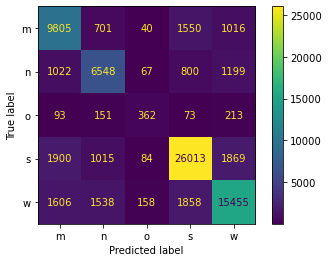

In [57]:
plot_confusion_matrix(knn, X_test, y_test)

Выбор оптимального значения параметра n

In [58]:
%%time

grid = GridSearchCV(KNeighborsClassifier(), param_grid = {'n_neighbors': range(1, 11)}, cv = 5)
grid.fit(X_train, y_train)

best_n_neighbors = grid.best_estimator_.n_neighbors

print('Optimal neighbor count: ', best_n_neighbors)

Optimal neighbor count:  1
Wall time: 1h 43min 12s


In [59]:
%%time

knn = KNeighborsClassifier()

knn.set_params(n_neighbors = best_n_neighbors)
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

print('Accuracy score on train data: {:.2f}%'.format(100 * accuracy_score(y_train, y_train_pred)))
print('Accuracy score on test  data: {:.2f}%'.format(100 * accuracy_score(y_test,  y_test_pred)))

Accuracy score on train data: 98.69%
Accuracy score on test  data: 80.40%
Wall time: 13min 18s


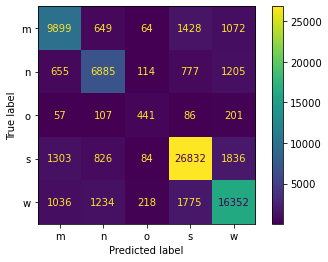

In [60]:
plot_confusion_matrix(knn, X_test, y_test)

Метод Random Forest

In [61]:
%%time

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train, y_train)

Wall time: 2min 42s


RandomForestClassifier(n_estimators=500)

In [62]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

print('Accuracy score on train data: {:.2f}%'.format(100 * accuracy_score(y_train, y_train_pred)))
print('Accuracy score on test  data: {:.2f}%'.format(100 * accuracy_score(y_test,  y_test_pred)))

Accuracy score on train data: 98.92%
Accuracy score on test  data: 82.49%


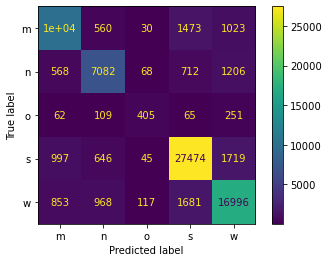

In [63]:
plot_confusion_matrix(rf, X_test, y_test)

In [64]:
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

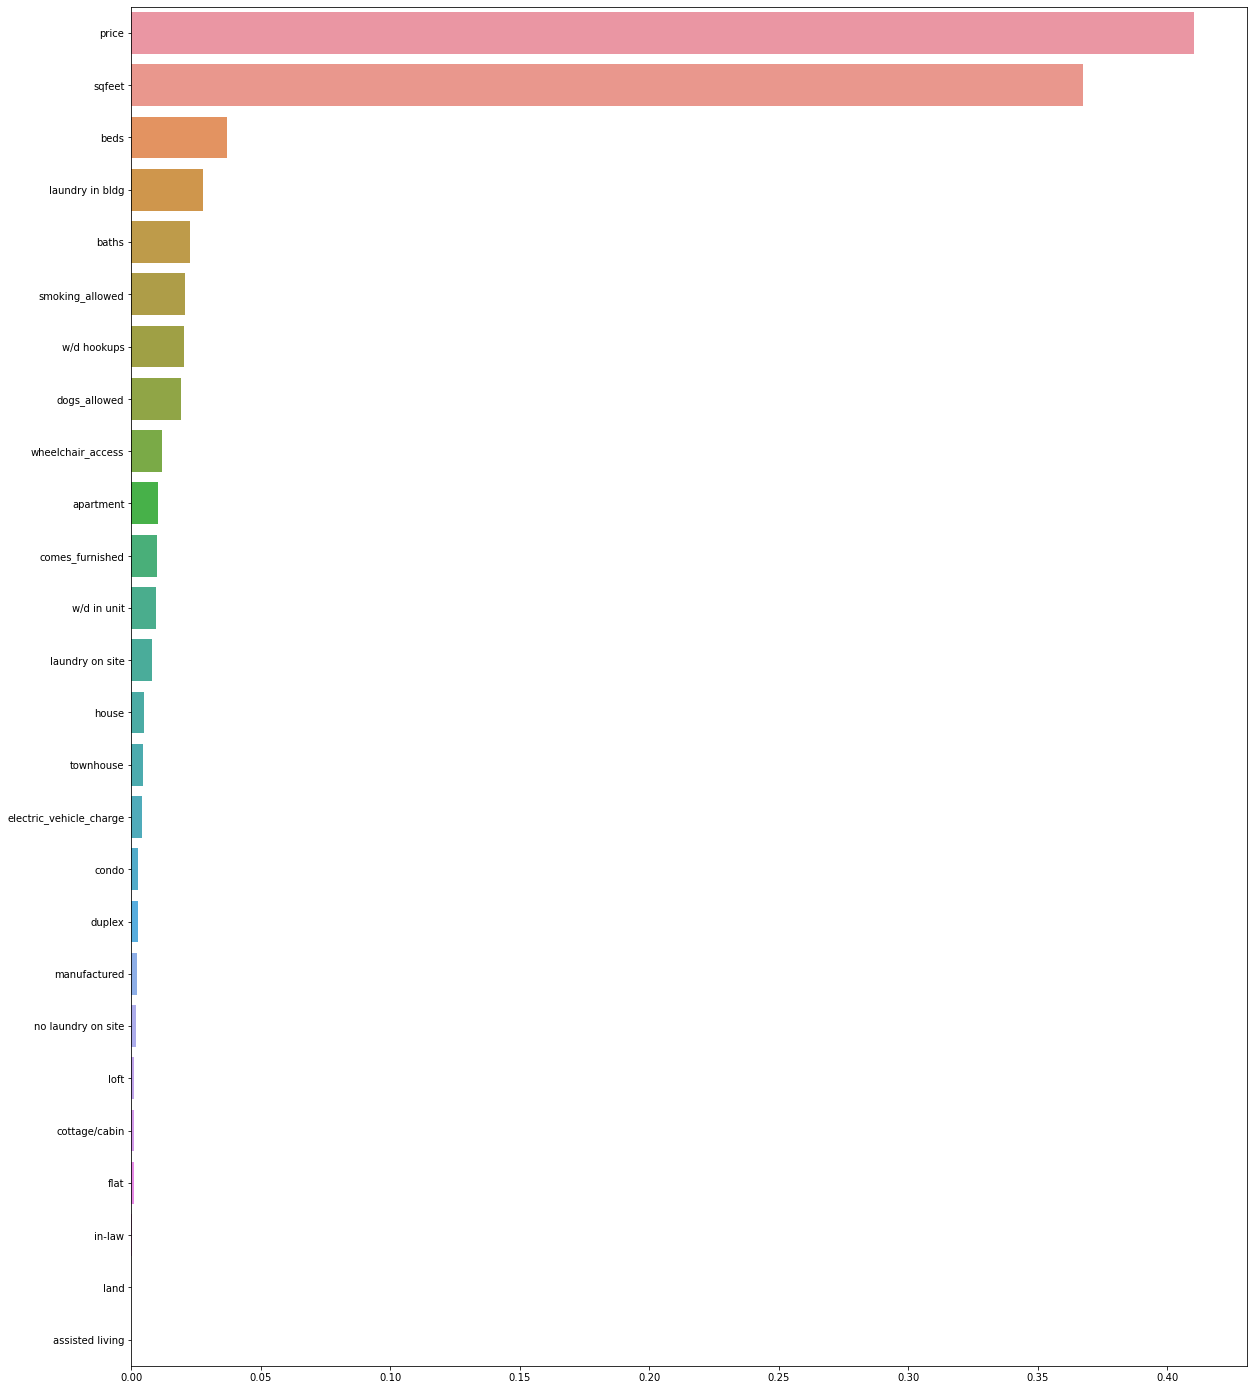

In [65]:
fig = plt.figure(figsize=(20, 25))
sns.barplot(y=importances.index, x=importances, orient='h')
pass

Важнейшими признаками оказались арендная плата и площадь квартиры.

### Выводы
1. Лучшую точность(82%) на тестовой выборке удалось достигнуть при помощи метода RandomForest.
2. Метод KNN показал наилучшую точность при n = 1. Достигнутая точность равна 80%.